# Modelagem do relevo de embasamento

In [4]:
# Importando bibliotecas do python
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [2]:
# Path referente aa localizacao da pasta modules:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/UFF/Projeto_Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Importando bibliotecas extras
import modeling
import prism

In [4]:
# Definindo variaveis relevantes para a modelagem

# Definindo variaveis mais simples
n_prism = 120  # numero de prismas a serem utilizados
xmin = 0       # valor minimo dos limites horizontais do modelo em metros
xmax = 60000   # valor maximo dos limites horizontais do modelo em metros

# Definindo as profundidades do topo e fundo dos prismas
p1 = 0.022*n_prism 
p2 = 0.15*n_prism
p3 = 0.16*n_prism
p4 = 0.28*n_prism
p5 = 0.585*n_prism
p6 = 0.717*n_prism
p7 = 0.725*n_prism
p8 = 0.98*n_prism
p9 = 0.985*n_prism

zmin = [] # valores de profundidade do topo dos prismas em metros
zmax = [] # valores de profundidade do fundo dos prismas em metros
for i in range (n_prism):
    zmin.append(0)
    if i < p1:
        zmax.append(90) # se refere ao primeiro valor de profundidade do modelo
    elif i < p2:
        zmax.append(400) # se refere ao segundo valor de profundidade do modelo
    elif i < p3:
        zmax.append(800) # se refere ao terceiro valor de profundidade do modelo
    elif i < p4:
        zmax.append(900) # se refere ao quarto valor de profundidade do modelo
    elif i < p5:
        zmax.append(1999) # se refere ao quinto valor de profundidade do modelo
    elif i < p6:
        zmax.append(900) # se refere ao sexto valor de profundidade do modelo
    elif i < p7:
        zmax.append(700) # se refere ao setimo valor de profundidade do modelo
    elif i < p8:
        zmax.append(400) # se refere ao oitavo valor de profundidade do modelo
    elif i < p9:
        zmax.append(50) # se refere ao nono valor de profundidade do modelo
    elif i <= n_prism:
        zmax.append(0) # se refere ao decimo valor de profundidade do modelo

# Convertendo zmax e zmin em arrays para poder usar a funcao 'multi_prism' abaixo
zmax = np.array(zmax)
zmin = np.array(zmin)

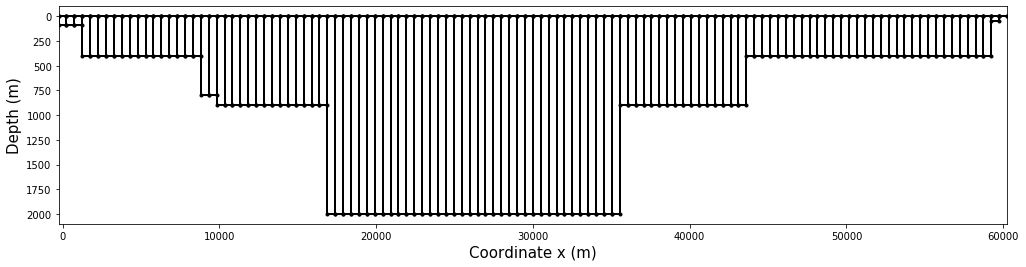

In [5]:
# Modelagem da bacia
x_prism, x_coord, z_coord = modeling.multi_prism(n_prism, xmin, xmax, zmin, zmax, index='all')

In [6]:
# Calculando a componente vertical da anomalia gravitacional ao longo do modelo de bacia

# Gerando as coordenadas dos pontos de observacoes
xo = np.linspace(xmin, xmax, n_prism) # coordenadas em x
yo = xo*0.0                           # coordenadas em y
zo = np.zeros(n_prism)                # coordenadas em z

# Considerando uma(s) desindade(s) para os prismas 
density = np.array([-0.24])

# Informacoes referentes aos prismas
deltax = 2.0 * x_prism
deltay = 1000.0
top = zmin
bottom = zmax
xprism = xo
yprism = np.zeros(n_prism)

# Calculando a componente vertical do campo gravitacional
gz = prism.prism3D_gz(xo, yo, zo, xprism, yprism, top, bottom, deltax, deltay, density)

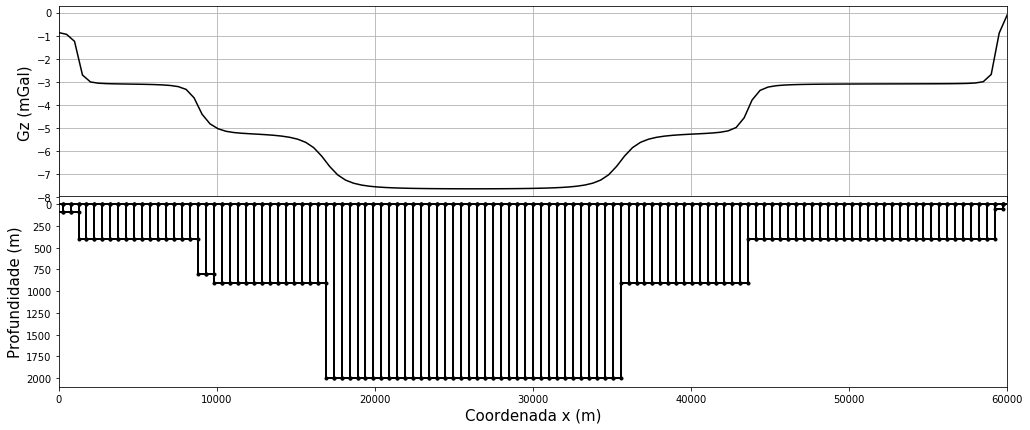

In [7]:
# Plotando
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(17, 7), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

# Plot do sinal original
ax1.plot(xo, gz, 'k-')
ax1.set_ylabel('Gz (mGal)', fontsize=15) # Determinando titulo para o eixo y
ax1.grid()                               # Estabelecendo linhas de grid da figura
ax1.set_xlim(0,60000)                    # Estabelecendo limites do eixo x

# Plot da modelagem do relevo de embasamento
for i in range (n_prism): # Plotando os diversos prismas que constituem o modelo
    ax2.plot(x_coord[i], z_coord[i], ".-k", linewidth=2)

ax2.set_ylabel('Profundidade (m)', fontsize=15) # Determinando titulo para o eixo y
ax2.set_xlabel('Coordenada x (m)', fontsize=15) # Determinando titulo para o eixo x
ax2.invert_yaxis()                              # Invertendo o eixo y

# Salvando figura
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG

# Visualizacao da figura
plt.show( )

In [8]:
# Gerando o ruido
n_obs = n_prism                             # numero de observacoes
media = 0                                   # media
std = 0.1                                   # desvio padrao
noise = np.random.normal(media, std, n_obs) # ruido

# Visualizacao do ruido gerado
noise

array([ 0.0698906 ,  0.04107741,  0.05580346,  0.07193517,  0.04128045,
       -0.07012213,  0.09667802, -0.12040765,  0.01247594, -0.0241146 ,
        0.13586256, -0.00294169, -0.11279152, -0.03271536,  0.00383706,
        0.10517698,  0.18605142, -0.04571533,  0.14192632, -0.11160497,
       -0.10866824,  0.06048723, -0.00416209,  0.08699701,  0.12697543,
       -0.11529963, -0.06887508,  0.01181331, -0.15405342,  0.05178744,
        0.09226472, -0.13146456,  0.05907102, -0.06649603,  0.23547996,
       -0.11512348,  0.08791689, -0.02523416, -0.14061137,  0.11462434,
        0.03651078,  0.03740831, -0.0659065 ,  0.2750074 , -0.02970049,
        0.04840955,  0.25901233,  0.17600649,  0.00265797,  0.22596863,
        0.06808913, -0.06411822,  0.16182033,  0.08518872, -0.09819734,
       -0.02883944, -0.0209053 , -0.19321879,  0.0061954 , -0.02347075,
       -0.1075577 ,  0.04792017,  0.0280903 , -0.18187063, -0.03536034,
        0.0361936 ,  0.17141701, -0.12751723, -0.22763282, -0.04

In [9]:
# Aplicando ruido ao sinal
gz_noise = gz + noise

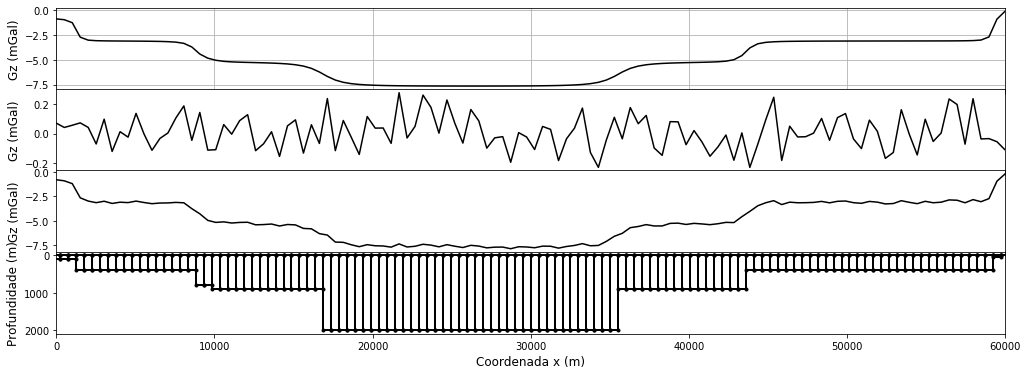

In [10]:
# Plotando
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(17, 6), facecolor='w', sharex=True, \
                                  gridspec_kw={'hspace': -0.01})

# Plot do sinal original
ax1.plot(xo, gz, 'k-')
ax1.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y
ax1.grid()                               # Estabelecendo linhas de grid da figura
ax1.set_xlim(0,60000)                    # Estabelecendo limites do eixo x

# Plot do ruído gerado
ax2.plot(xo, noise, 'k-')
ax2.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y

# Plot do sinal perturbado pelo ruido
ax3.plot(xo, gz_noise, 'k-')
ax3.set_ylabel('Gz (mGal)', fontsize=12) # Determinando titulo para o eixo y

# Plot da modelagem do relevo de embasamento
for i in range (n_prism): # Plotando os diversos prismas que constituem o modelo
    ax4.plot(x_coord[i], z_coord[i], ".-k", linewidth=2)

ax4.set_ylabel('Profundidade (m)', fontsize=12) # Determinando titulo para o eixo y
ax4.set_xlabel('Coordenada x (m)', fontsize=12) # Determinando titulo para o eixo x
ax4.invert_yaxis()                              # Invertendo o eixo y

# Salvando figura
#plt.savefig('figs/Figura.png', format='png') # Salvando a figura em uma imagem PNG

# Visualizacao da figura
plt.show( )

# Exportando informações que definem os prismas em arquivo .txt para reproduzi-los em outro script

In [11]:
# Exportando informacoes que definem os prismas

# Criando dataFrame com todos as informacoes dos prismas

# xprism - coordenadas horizontais do centro de cada prisma no eixo x
# yprism - coordenadas horizontais do centro de cada prisma no eixo y
# deltax - extensao horizontal de cada prisma no eixo x
# deltay - extensao horizontal de cada prisma no eixo y
# contrast of density - densidade de cada prisma
data = {'X(m)':xo,
        'Y(m)':zo, 
        'Z(m)':zo,
        'gz_obs(mGal)':gz_noise
       }
df = pd.DataFrame(data)
#df['deltax'] = deltax
#df['deltay'] = deltay
#df['contrast of density'] = density[0]

# Exportando dataFrame como arquivo .txt
df.to_csv('log_file.txt', header=True, index=False, sep='\t', mode='w')

In [12]:
# Visualizacao das informações que foram exportadas
df

,X(m),Y(m),Z(m),gz_obs(mGal)
0,0.000000,0.0,0.0,-0.795409
1,504.201681,0.0,0.0,-0.903162
2,1008.403361,0.0,0.0,-1.190305
3,1512.605042,0.0,0.0,-2.637764
4,2016.806723,0.0,0.0,-2.967793
...,...,...,...,...
115,57983.193277,0.0,0.0,-2.819352
116,58487.394958,0.0,0.0,-3.034851
117,58991.596639,0.0,0.0,-2.716049
118,59495.798319,0.0,0.0,-0.942139


In [13]:
# Acrescentando comentarios ao arquivo .txt
line = []
line.append('')
line.append('################## Tabela com as informações dos pontos de observações ##################')
line.append('')
line.append('contrast of density: ' + str(density[0]) + ' g/cm³')
line.append('deltay: ' + str(deltay) + ' metros')
line.append('deltax: ' + str(deltax) + ' metros')
line.append('')
line.append('######################### Informações relacionadas aos prismas #########################')
line.append('')
line.append('(g) contrast of density ==> valor de contraste de densidade considerado para os prismas em g/cm³;')
line.append('(f) deltay ==> extensao horizontal de cada prisma no eixo y em metros;')
line.append('(e) deltax ==> extensao horizontal de cada prisma no eixo x em metros;')
line.append('(c) Z ==> coordenadas verticais dos pontos de observação no eixo z em metros;')
line.append('(b) Y ==> coordenadas horizontais dos pontos de observação no eixo y em metros;')
line.append('(a) X ==> coordenadas horizontais dos pontos de observação no eixo x em metros.')
line.append('')
line.append('############################### Descrição das informações ##############################')
line.append('')
line.append('Além dessas informações, são fornecidas algumas informações extras referentes a prismas utilizados na modelagem do relevo de embasamento de uma determinada bacia do local do levantamento.')
line.append('Ele fornece as coordenadas em x, y e z de cada ponto de observação e anomalia observada referente a cada ponto.')
line.append('O arquivo fornece informações referentes a um levantamento gravimétrico sintético.')
line.append('')
line.append('################################# Descrição do arquivo #################################')
line.append('')
line.append('########################################################################################')
line.append('############################ Autor: Bruno Lima de Freitas ##############################')
line.append('########################################################################################')
filename = "log_file.txt"
for i in range (len(line)):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line[i].rstrip('\r\n') + '\n' + content)

In [1]:
prof_raw = [0.0000 , 0.1100, 0.1100 , 0.2200 , 0.3300, 0.3300, 0.3700, 0.4400]
atrib_1_raw = [0, 1, 1, 2, 3, 3, 3, 4]
atrib_2_raw = [0, 1, 1, 2, 3, 3, 3, 4]
atrib_3_raw = [0, 1, 1, 2, 3, 3, 3, 4]

In [5]:
data = {'Prof.':prof_raw,
        'Atributo.1':atrib_1_raw, 
        'Atributo.2':atrib_2_raw,
        'Atributo.3':atrib_3_raw
       }
df = pd.DataFrame(data)

In [6]:
df

,Prof.,Atributo.1,Atributo.2,Atributo.3
0,0.00,0,0,0
1,0.11,1,1,1
2,0.11,1,1,1
3,0.22,2,2,2
4,0.33,3,3,3
5,0.33,3,3,3
6,0.37,3,3,3
7,0.44,4,4,4


In [ ]:
df.groupby